In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [2]:
type(data)

dict

In [3]:
import pandas as pd

In [4]:
#See all Columns instead of only 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
import pandas as pd

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\Long\AppData\Local\Temp\ipykernel_8332\691824653.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.940620e+07,1.940620e+07,False,NaN,1,NaN,NaN,None,2023-06-19T05:32:00.000Z,26431.297589,9.557593e+09,-10.1576,0.211034,-0.597614,2.389641,-1.639751,-8.403888,-5.305808,5.129310e+11,48.1202,5.550572e+11,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 05:33:49.813672
1,1027,Ethereum,ETH,ethereum,7015,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202088e+08,1.202088e+08,True,NaN,2,NaN,NaN,None,2023-06-19T05:32:00.000Z,1724.721208,3.839318e+09,-18.7790,0.230104,-0.458632,-0.852193,-4.785466,-11.581596,-1.231176,2.073267e+11,19.4543,2.073267e+11,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 05:33:49.813672
2,825,Tether,USDT,tether,55650,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.317388e+10,8.858353e+10,True,NaN,3,NaN,NaN,None,2023-06-19T05:32:00.000Z,0.999861,1.427745e+10,-12.5943,0.002408,0.013061,-0.030913,-0.037570,-0.071347,-0.197131,8.316231e+10,7.8034,8.857121e+10,None,2023-06-19T05:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-19 05:33:49.813672
3,1839,BNB,BNB,bnb,1462,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558533e+08,1.558533e+08,False,NaN,4,NaN,NaN,None,2023-06-19T05:32:00.000Z,243.114023,3.674799e+08,-18.9043,0.016633,-0.874869,7.357764,-21.132611,-25.228472,-27.495364,3.789012e+10,3.5554,3.789012e+10,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 05:33:49.813672
4,3408,USD Coin,USDC,usd-coin,13034,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.834417e+10,2.834417e+10,False,NaN,5,NaN,NaN,None,2023-06-19T05:32:00.000Z,1.000000,1.977345e+09,-9.8643,-0.011971,-0.011994,0.014878,0.003116,-0.004369,0.180856,2.834418e+10,2.6596,2.834418e+10,None,2023-06-19T05:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-19 05:33:49.813672
5,52,XRP,XRP,xrp,967,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,None,2023-06-19T05:32:00.000Z,0.491291,8.272386e+08,38.0833,0.176120,1.955360,-4.910030,5.825668,-1.178914,27.523019,2.554075e+10,2.3962,4.912909e+10,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 05:33:49.813672
6,2010,Cardano,ADA,cardano,841,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.492507e+10,3.588987e+10,False,NaN,7,NaN,NaN,None,2023-06-19T05:32:00.000Z,0.261748,1.296637e+08,-26.9967,0.329451,-2.387128,-3.925122,-28.300316,-37.459502,-22.863108,9.141572e+09,0.8578,1.177866e+10,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 05:33:49.813672
7,74,Dogecoin,DOGE,dogecoin,729,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.398270e+11,1.398270e+11,True,NaN,8,NaN,NaN,None,2023-06-19T05:32:00.000Z,0.062085,2.305538e+08,43.4068,0.251846,0.187084,2.011923,-15.468476,-31.984527,-13.894001,8.681226e+09,0.8146,8.681226e+09,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 05:33:49.813672
8,1958,TRON,TRX,tron,772,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem]",NaN,9.004050e+10,9.0

In [6]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df2 = pd.json_normalize(data['data'])
    from datetime import datetime
    df['timestamp'] = datetime.now()
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])


In [8]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(30) #sleep for 1 minute
exit()

API Runner completed


KeyboardInterrupt: 

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.940620e+07,1.940620e+07,False,NaN,1,NaN,NaN,None,2023-06-19T05:32:00.000Z,26431.297589,9.557593e+09,-10.1576,0.211034,-0.597614,2.389641,-1.639751,-8.403888,-5.305808,5.129310e+11,48.1202,5.550572e+11,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,7015,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202088e+08,1.202088e+08,True,NaN,2,NaN,NaN,None,2023-06-19T05:32:00.000Z,1724.721208,3.839318e+09,-18.7790,0.230104,-0.458632,-0.852193,-4.785466,-11.581596,-1.231176,2.073267e+11,19.4543,2.073267e+11,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,55650,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.317388e+10,8.858353e+10,True,NaN,3,NaN,NaN,None,2023-06-19T05:32:00.000Z,0.999861,1.427745e+10,-12.5943,0.002408,0.013061,-0.030913,-0.037570,-0.071347,-0.197131,8.316231e+10,7.8034,8.857121e+10,None,2023-06-19T05:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1462,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558533e+08,1.558533e+08,False,NaN,4,NaN,NaN,None,2023-06-19T05:32:00.000Z,243.114023,3.674799e+08,-18.9043,0.016633,-0.874869,7.357764,-21.132611,-25.228472,-27.495364,3.789012e+10,3.5554,3.789012e+10,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,13034,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.834417e+10,2.834417e+10,False,NaN,5,NaN,NaN,None,2023-06-19T05:32:00.000Z,1.000000,1.977345e+09,-9.8643,-0.011971,-0.011994,0.014878,0.003116,-0.004369,0.180856,2.834418e+10,2.6596,2.834418e+10,None,2023-06-19T05:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
5,52,XRP,XRP,xrp,967,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,None,2023-06-19T05:32:00.000Z,0.491291,8.272386e+08,38.0833,0.176120,1.955360,-4.910030,5.825668,-1.178914,27.523019,2.554075e+10,2.3962,4.912909e+10,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN
6,2010,Cardano,ADA,cardano,841,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.492507e+10,3.588987e+10,False,NaN,7,NaN,NaN,None,2023-06-19T05:32:00.000Z,0.261748,1.296637e+08,-26.9967,0.329451,-2.387128,-3.925122,-28.300316,-37.459502,-22.863108,9.141572e+09,0.8578,1.177866e+10,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN
7,74,Dogecoin,DOGE,dogecoin,729,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.398270e+11,1.398270e+11,True,NaN,8,NaN,NaN,None,2023-06-19T05:32:00.000Z,0.062085,2.305538e+08,43.4068,0.251846,0.187084,2.011923,-15.468476,-31.984527,-13.894001,8.681226e+09,0.8146,8.681226e+09,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN
8,1958,TRON,TRX,tron,772,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem]",NaN,9.004050e+10,9.004051e+10,True,NaN,9,7.165966e+10,5.021053e+09,None,2023-06-19T05:32:00.000Z,0.070068,1.492130e+08,15.1274,0.047629,-2.592089,0.110950,-0.993115,5.720440,6.289885,6.308963e+09,0.5919,6.308964e+09,None,2023-06-19T05:32:00.000Z,

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19406200.00000,19406200.00000,False,NaN,1,NaN,NaN,None,2023-06-19T05:32:00.000Z,26431.29759,9557592849.89674,-10.15760,0.21103,-0.59761,2.38964,-1.63975,-8.40389,-5.30581,512931047278.36646,48.12020,555057249376.27002,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,7015,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120208826.30512,120208826.30512,True,NaN,2,NaN,NaN,None,2023-06-19T05:32:00.000Z,1724.72121,3839318043.10224,-18.77900,0.23010,-0.45863,-0.85219,-4.78547,-11.58160,-1.23118,207326712155.61353,19.45430,207326712155.60999,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,55650,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83173876278.08653,88583529362.30705,True,NaN,3,NaN,NaN,None,2023-06-19T05:32:00.000Z,0.99986,14277454018.41191,-12.59430,0.00241,0.01306,-0.03091,-0.03757,-0.07135,-0.19713,83162309958.20418,7.80340,88571210765.62000,None,2023-06-19T05:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1462,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155853306.39274,155853306.39274,False,NaN,4,NaN,NaN,None,2023-06-19T05:32:00.000Z,243.11402,367479913.26528,-18.90430,0.01663,-0.87487,7.35776,-21.13261,-25.22847,-27.49536,37890124352.31113,3.55540,37890124352.31000,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,13034,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28344169642.40258,28344169642.40258,False,NaN,5,NaN,NaN,None,2023-06-19T05:32:00.000Z,1.00000,1977344924.11987,-9.86430,-0.01197,-0.01199,0.01488,0.00312,-0.00437,0.18086,28344180709.01112,2.65960,28344180709.01000,None,2023-06-19T05:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
5,52,XRP,XRP,xrp,967,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51987017573.00000,99988884267.00000,False,NaN,6,NaN,NaN,None,2023-06-19T05:32:00.000Z,0.49129,827238553.43839,38.08330,0.17612,1.95536,-4.91003,5.82567,-1.17891,27.52302,25540751218.17669,2.39620,49129094936.66000,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN
6,2010,Cardano,ADA,cardano,841,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34925074154.09400,35889872797.59600,False,NaN,7,NaN,NaN,None,2023-06-19T05:32:00.000Z,0.26175,129663734.97292,-26.99670,0.32945,-2.38713,-3.92512,-28.30032,-37.45950,-22.86311,9141571994.55484,0.85780,11778664747.85000,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN
7,74,Dogecoin,DOGE,dogecoin,729,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139827036383.70523,139827036383.70523,True,NaN,8,NaN,NaN,None,2023-06-19T05:32:00.000Z,0.06209,230553768.00509,43.40680,0.25185,0.18708,2.01192,-15.46848,-31.98453,-13.89400,8681226171.91138,0.81460,8681226171.91000,None,2023-06-19T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN
8,1958,TRON,TRX,tron,772,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem]",NaN,90040501455.59225,90040512039.29773,True,NaN,9,71659659264.00000,5021053249.41260,N

In [12]:
#Looking at coin treads over time 
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.21103,-0.59761,2.38964,-1.63975,-8.40389,-5.30581
Ethereum,0.23010,-0.45863,-0.85219,-4.78547,-11.58160,-1.23118
Tether,0.00241,0.01306,-0.03091,-0.03757,-0.07135,-0.19713
BNB,0.01663,-0.87487,7.35776,-21.13261,-25.22847,-27.49536
USD Coin,-0.01197,-0.01199,0.01488,0.00312,-0.00437,0.18086
XRP,0.17612,1.95536,-4.91003,5.82567,-1.17891,27.52302
Cardano,0.32945,-2.38713,-3.92512,-28.30032,-37.45950,-22.86311
Dogecoin,0.25185,0.18708,2.01192,-15.46848,-31.98453,-13.89400
TRON,0.04763,-2.59209,0.11095,-0.99312,5.72044,6.28988


In [13]:
df4 = df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h      0.21103
          quote.USD.percent_change_24h    -0.59761
          quote.USD.percent_change_7d      2.38964
          quote.USD.percent_change_30d    -1.63975
          quote.USD.percent_change_60d    -8.40389
          quote.USD.percent_change_90d    -5.30581
Ethereum  quote.USD.percent_change_1h      0.23010
          quote.USD.percent_change_24h    -0.45863
          quote.USD.percent_change_7d     -0.85219
          quote.USD.percent_change_30d    -4.78547
          quote.USD.percent_change_60d   -11.58160
          quote.USD.percent_change_90d    -1.23118
Tether    quote.USD.percent_change_1h      0.00241
          quote.USD.percent_change_24h     0.01306
          quote.USD.percent_change_7d     -0.03091
          quote.USD.percent_change_30d    -0.03757
          quote.USD.percent_change_60d    -0.07135
          quote.USD.percent_change_90d    -0.19713
BNB       quote.USD.percent_change_1h      

In [14]:
type(df4)

pandas.core.series.Series

In [15]:
df5 = df4.to_frame(name='values')
df5

values
name                                           
Bitcoin  quote.USD.percent_change_1h    0.21103
         quote.USD.percent_change_24h  -0.59761
         quote.USD.percent_change_7d    2.38964
         quote.USD.percent_change_30d  -1.63975
         quote.USD.percent_change_60d  -8.40389
         quote.USD.percent_change_90d  -5.30581
Ethereum quote.USD.percent_change_1h    0.23010
         quote.USD.percent_change_24h  -0.45863
         quote.USD.percent_change_7d   -0.85219
         quote.USD.percent_change_30d  -4.78547
         quote.USD.percent_change_60d -11.58160
         quote.USD.percent_change_90d  -1.23118
Tether   quote.USD.percent_change_1h    0.00241
         quote.USD.percent_change_24h   0.01306
         quote.USD.percent_change_7d   -0.03091
         quote.USD.percent_change_30d  -0.03757
         quote.USD.percent_change_60d  -0.07135
         quote.USD.percent_change_90d  -0.19713
BNB      quote.USD.percent_change_1h    0.01663
         quote.USD.percent_change_24h  -0.87487
         quote.USD.percent_change_7d    7.35776
         quote.USD.percent_change_30d -21.13261
         quote.USD.percent_change_60d -25.22847
         quote.USD.percent_change_90d -27.49536
USD Coin quote.USD.percent_change_1h   -0.01197
         quote.USD.percent_change_24h  -0.01199
         quote.USD.percent_change_7d    0.01488
         quote.USD.percent_change_30d   0.00312
         quote.USD.percent_change_60d  -0.00437
         quote.USD.percent_change_90d   0.18086
XRP      quote.USD.percent_change_1h    0.17612
         quote.USD.percent_change_24h   1.95536
         quote.USD.percent_change_7d   -4.91003
         quote.USD.percent_change_30d   5.82567
         quote.USD.percent_change_60d  -1.17891
         quote.USD.percent_change_90d  27.52302
Cardano  quote.USD.percent_change_1h    0.32945
         quote.USD.percent_change_24h  -2.38713
         quote.USD.percent_change_7d   -3.92512
         quote.USD.percent_change_30d -28.30032
         quote.USD.percent_change_60d -37.45950
         quote.USD.percent_change_90d -22.86311
Dogecoin quote.USD.percent_change_1h    0.25185
         quote.USD.percent_change_24h   0.18708
         quote.USD.percent_change_7d    2.01192
         quote.USD.percent_change_30d -15.46848
         quote.USD.percent_change_60d -31.98453
         quote.USD.percent_change_90d -13.89400
TRON     quote.USD.percent_change_1h    0.04763
         quote.USD.percent_change_24h  -2.59209
         quote.USD.percent_change_7d    0.11095
         quote.USD.percent_change_30d  -0.99312
         quote.USD.percent_change_60d   5.72044
         quote.USD.percent_change_90d   6.28988
Solana   quote.USD.percent_change_1h    0.08250
         quote.USD.percent_change_24h  -0.89213
         quote.USD.percent_change_7d    2.04653
         quote.USD.percent_change_30d -23.52449
         quote.USD.percent_change_60d -32.05575
         quote.USD.percent_change_90d -31.49606
Litecoin quote.USD.percent_change_1h    0.21955
         quote.USD.percent_change_24h  -0.09303
         quote.USD.percent_change_7d    1.29159
         quote.USD.percent_change_30d -15.23118
         quote.USD.percent_change_60d -14.94232
         quote.USD.percent_change_90d  -2.22884
Polygon  quote.USD.percent_change_1h    0.15664
         quote.USD.percent_change_24h  -2.06290
         quote.USD.percent_change_7d   -4.84325
         quote.USD.percent_change_30d -30.95104
         quote.USD.percent_change_60d -45.09344
         quote.USD.percent_change_90d -46.33577
Polkadot quote.USD.percent_change_1h    0.04865
         quote.USD.percent_change_24h   0.54613
         quote.USD.percent_change_7d    1.65478
         quote.USD.percent_change_30d -14.74967
         quote.USD.percent_change_60d -28.63172
         quote.USD.percent_change_90d -25.81808
Toncoin  quote.USD.percent_change_1h    0.05561
         quote.USD.percent_change_24h  -0.62310
         quote.USD.percent_change_7d   -6.72576
         quote.USD.percent_change_30d -26.05628
         

In [16]:
type(df5)

pandas.core.frame.DataFrame

In [17]:
df5.count()

values    90
dtype: int64

In [18]:
index = pd.Index(range(90))

In [19]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.21103
1,Bitcoin,quote.USD.percent_change_24h,-0.59761
2,Bitcoin,quote.USD.percent_change_7d,2.38964
3,Bitcoin,quote.USD.percent_change_30d,-1.63975
4,Bitcoin,quote.USD.percent_change_60d,-8.40389
5,Bitcoin,quote.USD.percent_change_90d,-5.30581
6,Ethereum,quote.USD.percent_change_1h,0.23010
7,Ethereum,quote.USD.percent_change_24h,-0.45863
8,Ethereum,quote.USD.percent_change_7d,-0.85219
9,Ethereum,quote.USD.percent_change_30d,-4.78547


In [20]:
# Changing name
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.21103
1,Bitcoin,quote.USD.percent_change_24h,-0.59761
2,Bitcoin,quote.USD.percent_change_7d,2.38964
3,Bitcoin,quote.USD.percent_change_30d,-1.63975
4,Bitcoin,quote.USD.percent_change_60d,-8.40389
5,Bitcoin,quote.USD.percent_change_90d,-5.30581
6,Ethereum,quote.USD.percent_change_1h,0.23010
7,Ethereum,quote.USD.percent_change_24h,-0.45863
8,Ethereum,quote.USD.percent_change_7d,-0.85219
9,Ethereum,quote.USD.percent_change_30d,-4.78547


In [21]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.21103
1,Bitcoin,24h,-0.59761
2,Bitcoin,7d,2.38964
3,Bitcoin,30d,-1.63975
4,Bitcoin,60d,-8.40389
5,Bitcoin,90d,-5.30581
6,Ethereum,quote.USD.percent_change_1h,0.23010
7,Ethereum,24h,-0.45863
8,Ethereum,7d,-0.85219
9,Ethereum,30d,-4.78547


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

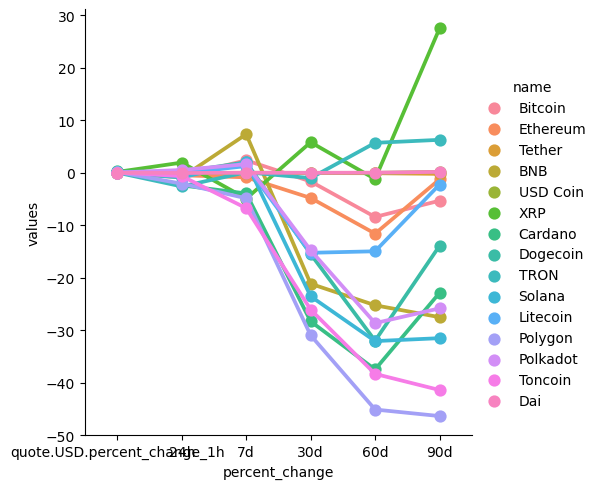

In [23]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [40]:
print(df.columns)

Index(['index', 'id', 'name', 'symbol', 'slug', 'num_market_pairs',
       'date_added', 'tags', 'max_supply', 'circulating_supply',
       'total_supply', 'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address'],
      dtype='object')


In [45]:
df10 = df[['name','quote.USD.price','max_supply']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,max_supply
0,Bitcoin,26431.29759,21000000.00000
15,Bitcoin,26431.29759,21000000.00000


<Axes: xlabel='max_supply', ylabel='quote.USD.price'>

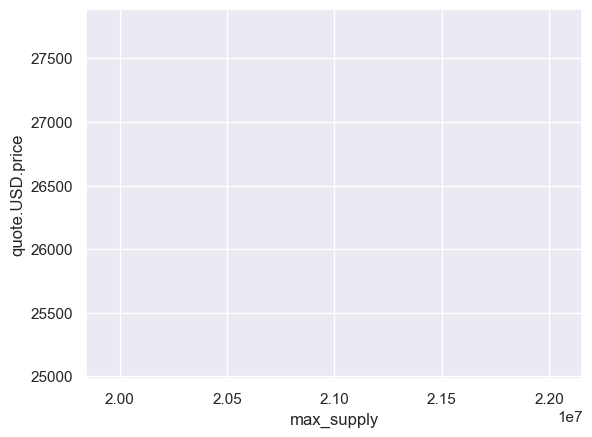

In [47]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='max_supply', y='quote.USD.price', data = df10)